#**README**

---

## About the notebook
This notebook demonstrates how Embeddings and the Euclidean Distance can be used to find similarities between polysemous words. A smaller distance means more similarity. We will demonstrate how word2vec handles the word "Mouse" and how different meanings would cluster. </br>
*Pre-requisites:* To run this notebook, you need an access key to the OpenAI API. You can get your API key from [openai](https://platform.openai.com/account/api-keys).

## Topic: Embeddings and Euclidean Distance
**Embeddings** are low-dimentional vector representation of complex, high-dimentional data that captures semantic meaning and relationship.</br>
**Euclidean Distance** is the straight line distance between two points in a multi-dimensional space.</br>
Combined, these help machines understand the human world. </br>
Use Case: A popular use case is a recommendation system suggesting "You may also like..." — such as Netflix, LinkedIn, Amazon, Dating apps, and many more.</br>
How it Works:
 - Set up the user’s profile as vectors based on their preferences.
 - Calculate similarities as Euclidean distance between user profiles.
 - Make Recommendations based on the computed Euclidean distance and the unseen item/content. A smaller distance means more similar taste profiles, which in turn means a better recommendation. </br>

## Conclusion
Embeddings and Euclidean Distance are foundational concepts in machine learning and data science. Embeddings teach machines how to understand "meaning" through mathematics, enabling AI systems to work with concepts rather than just symbols. Euclidean distance quantifies similarity. Smaller distances mean more similar data points.

---

In [92]:
# Hands-on excercise using OpenAI API and GPT4.1

### About this excercise:
</br>

|Category|Description|
|:--|:--|
|Task |Generate Embeddings and Calculate the Euclidean Distance between different usages of the word "Mouse"|
|Difficuly Level|Beginner|
|Skills|Python|
</br>

In [93]:
#Import display and Markdown from IPython for formatted rendering of generated response
from IPython.display import Markdown, display

In [94]:
def printmd(string):
    display(Markdown(string))

Access setup - This function allows secure access to user-defined secrets stored in the Colab environment, such as API keys.

In [95]:
from google.colab import userdata

Import - interact with the OpenAI API, allows us to make requests to models like GPT-4.1

In [96]:
from openai import OpenAI

Configure Access Key - in this exmpale, for open api. </br>
How to configure API access keys in Colab:

1. Go to the "🔑" icon in the left sidebar (Secrets).
2. Click "Add new secret".
3. For the name, use 'openai_api_key'.
4. For the value, paste your OpenAI API key.
5. Make sure "Notebook access" is enabled for this secret.

In [97]:
client = OpenAI(api_key=userdata.get('openai_api_key'))

Create Embeddings for multiple inputs where word "Mouse" is used in different contexts and meaning:</br>

|Context|Similar words|
|:--|:--|
|Computer Mouse|trackpad, cursor, pointer|
|Rodent Mouse|rat, hamster, PEW, Albino rats|
|Cartoon Mouse|Mickey mouse, Disney, cartoon|
|Personality Mouse|quiet, shy,timid, meek|

</br>


In [98]:
response_computer_mouse = client.embeddings.create(
    input="Jimmy has an ergonomically designed mouse",
    model="text-embedding-3-small"
)
embedding_computer_mouse = response_computer_mouse.data[0].embedding

response_rodent_mouse = client.embeddings.create(
    input="Jimmy saw a rat in the kitchen yesterday",
    model="text-embedding-3-small"
)
embedding_rodent_mouse = response_rodent_mouse.data[0].embedding

response_cartoon_mouse = client.embeddings.create(
    input="Jimmy loves mickey mouse cartoons",
    model="text-embedding-3-small"
)
embedding_cartoon_mouse = response_cartoon_mouse.data[0].embedding

response_personality_mouse = client.embeddings.create(
    input="Jimmy is such a mouse when it comes to heated arguments in meetings",
    model="text-embedding-3-small"
)
embedding_personality_mouse = response_personality_mouse.data[0].embedding

response_lab_mouse = client.embeddings.create(
    input="Jimmy has Albino rats at his labs",
    model="text-embedding-3-small"
)
embedding_lab_mouse = response_lab_mouse.data[0].embedding

Import numpy to calculate the Euclidean Distance

In [99]:
import numpy as np

In [100]:
point1 = np.array(embedding_computer_mouse)
point2 = np.array(embedding_rodent_mouse)
point3 = np.array(embedding_cartoon_mouse)
point4 = np.array(embedding_personality_mouse)
point5 = np.array(embedding_lab_mouse)

# Calculate the Euclidean distance
distance_computer_mouse_rodent_mouse = np.linalg.norm(point1 - point2)
distance_computer_mouse_cartoon_mouse = np.linalg.norm(point1 - point3)
distance_computer_mouse_personality_mouse = np.linalg.norm(point1 - point4)
distance_computer_mouse_lab_mouse = np.linalg.norm(point1 - point5)

distance_rodent_mouse_cartoon_mouse = np.linalg.norm(point2 - point3)
distance_rodent_mouse_personality_mouse = np.linalg.norm(point2 - point4)
distance_rodent_mouse_lab_mouse = np.linalg.norm(point2 - point5)

distance_cartoon_mouse_personality_mouse = np.linalg.norm(point3 - point4)
distance_cartoon_mouse_lab_mouse = np.linalg.norm(point3 - point5)

distance_personality_mouse_lab_mouse = np.linalg.norm(point4 - point5)

Print the table to visualize data using pandas and matplotlib's pyplot

In [101]:
import matplotlib.pyplot as plt

In [102]:
import pandas as pd

In [103]:
# Create a DataFrame from the labels and distances
data = {'Comparison': labels, 'Euclidean Distance': distances}
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,Comparison,Euclidean Distance
0,Computer Mouse - Rodent Mouse,1.079491
1,Computer Mouse - Cartoon Mouse,1.094856
2,Computer Mouse - Personality Mouse,0.988536
3,Computer Mouse - Lab Mouse,1.056408
4,Rodent Mouse - Cartoon Mouse,1.073620
5,Rodent Mouse - Personality Mouse,1.028826
6,Rodent Mouse - Lab Mouse,0.900400
7,Cartoon Mouse - Personality Mouse,0.991059
8,Cartoon Mouse - Lab Mouse,1.111780
9,Personality Mouse - Lab Mouse,1.062185


Import seaborn to generate visualization on data

In [104]:
import seaborn as sns

Generate heatmap visualization using dataFrame

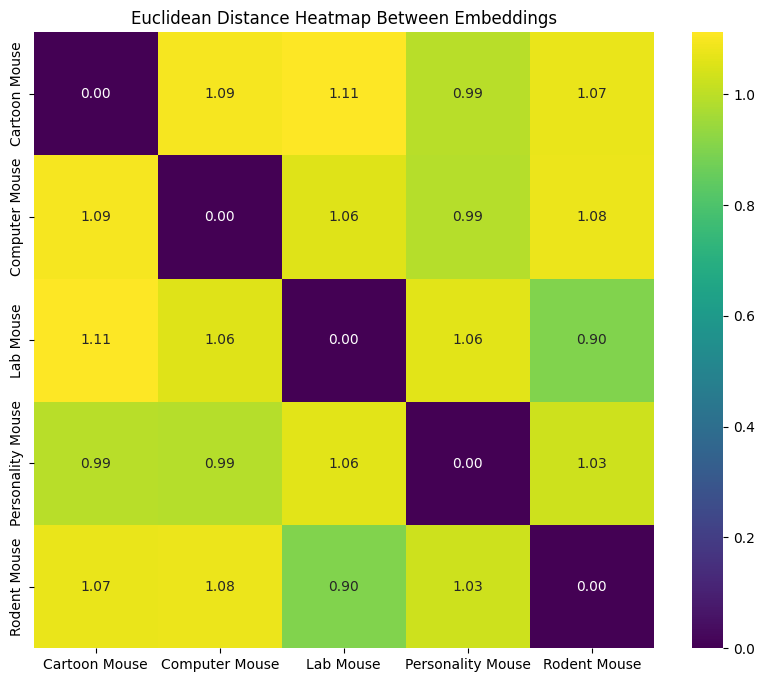

In [105]:
# Create a square matrix for the heatmap
# We need a list of unique labels to create the matrix
all_labels = sorted(list(set([item for sublist in [pair.split(' - ') for pair in df['Comparison']] for item in sublist])))

# Initialize a matrix with zeros
distance_matrix = pd.DataFrame(0.0, index=all_labels, columns=all_labels)

# Populate the matrix with distances from the DataFrame
for index, row in df.iterrows():
    item1, item2 = row['Comparison'].split(' - ')
    distance_matrix.loc[item1, item2] = row['Euclidean Distance']
    distance_matrix.loc[item2, item1] = row['Euclidean Distance'] # Heatmap is symmetric

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Euclidean Distance Heatmap Between Embeddings")
plt.show()

---
##Congratulations on running this fun exercise!
Euclidean distance quantifies similarity - smaller distances mean more similar data points. You just proved it yourself!</br>

*Fun Fact:* The shortest distance is ZERO when the words are identical.</br>
*Extra Credit:* Check CBOW(Continuous Bag-Of-Words) and Skip-Gram that will further boost your understanding of Word Embeddings.</br>
*Pro Tip:* Try variations on rendering output response for words like "small" and "tiny" or "bank"(financial) and "bank"(river) and observe difference in how it clusters the data.</br></br>
If you are an AI Enthusiast, don't stop here, start experimenting, have fun!</br>